# Experiments
This notebook contains experiments we ran before getting our final model.

### Setup

In [1]:
from fastbook import *
from fastai.vision.all import *
import pandas as pd

In [2]:
def _plot_top_losses(self, k, largest=True, **kwargs):
    losses,idx = self.top_losses(k, largest)
    if not isinstance(self.inputs, tuple): self.inputs = (self.inputs,)
    if isinstance(self.inputs[0], Tensor): inps = tuple(o[idx] for o in self.inputs)
    else: inps = self.dl.create_batch(self.dl.before_batch([tuple(o[i] for o in self.inputs) for i in idx]))
    b = inps + tuple(o[idx] for o in (self.targs if is_listy(self.targs) else (self.targs,)))
    x,y,its = self.dl._pre_show_batch(b, max_n=k)
    b_out = inps + tuple(o[idx] for o in (self.decoded if is_listy(self.decoded) else (self.decoded,)))
    x1,y1,outs = self.dl._pre_show_batch(b_out, max_n=k)
    if its is not None:
        plot_top_losses(x, y, its, outs.itemgot(slice(len(inps), None)), self.preds[idx], losses, **kwargs)
ClassificationInterpretation.plot_top_losses = _plot_top_losses

In [2]:
path = '/home/cp47/CS344FinalProject/data/'

In [3]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

In [4]:
df = pd.read_csv(path + 'icml_face_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1    Usage   35887 non-null  object
 2    pixels  35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [6]:
df[' Usage'].unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

In [7]:
def get_x(data): 
    images = np.fromstring(data[' pixels'], dtype=int, sep=' ')
    images = np.reshape(images, (48, 48)).astype(np.uint8)
    return images
def get_y(data): return emotions[data['emotion']]

In [8]:
def splitter(data):
    train = data.index[data[' Usage'] == 'Training'].tolist()
    valid = data.index[data[' Usage'] != 'Training'].tolist()
    return train, valid

In [9]:
dblock = DataBlock(blocks=(ImageBlock(cls=PILImage), CategoryBlock),
                   get_x = get_x,
                   get_y = get_y,
                   splitter=splitter)

In [10]:
dsets = dblock.datasets(df)

In [11]:
dls = dblock.dataloaders(df)

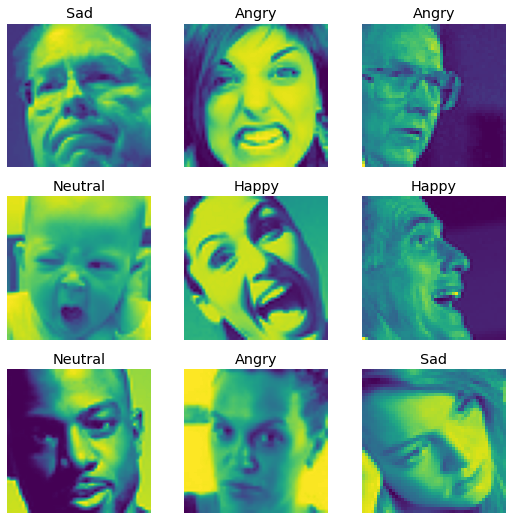

In [12]:
dls.train.show_batch()

### RESNET34

In [15]:
learn = cnn_learner(dls, resnet34, loss_func=CrossEntropyLossFlat(), metrics=accuracy)

SuggestedLRs(valley=0.0030199517495930195)

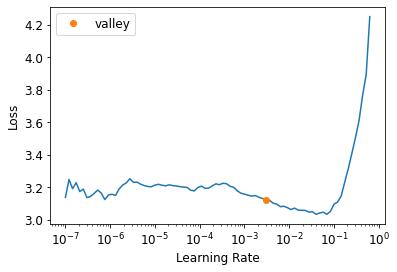

In [16]:
learn.lr_find()

In [27]:
learn.fine_tune(8, 0.004)

epoch,train_loss,valid_loss,accuracy,time
0,0.392404,1.472241,0.605740,00:43


epoch,train_loss,valid_loss,accuracy,time
0,0.489620,1.360426,0.592087,00:55
1,0.575778,1.315913,0.590137,00:55
2,0.576659,1.306227,0.598774,00:55
3,0.378173,1.507499,0.600307,00:55
4,0.213892,1.656390,0.612705,00:55
5,0.099524,1.895560,0.618696,00:55
6,0.034743,2.025869,0.624408,00:55
7,0.020180,2.037538,0.625801,00:55


In [17]:
learn.fine_tune(50, 0.003)

epoch,train_loss,valid_loss,accuracy,time
0,1.856192,1.685002,0.341042,00:15


epoch,train_loss,valid_loss,accuracy,time
0,1.424926,1.383171,0.476317,00:19
1,1.241230,1.292200,0.513374,00:21
2,1.007668,1.302720,0.530231,00:21
3,0.771556,1.427926,0.533714,00:20
4,0.592655,1.585936,0.534550,00:23
5,0.503132,1.700921,0.526052,00:22
6,0.474591,1.724739,0.542212,00:23
7,0.468821,1.660462,0.547646,00:30
8,0.454176,1.707591,0.543187,00:31
9,0.444294,1.699175,0.542909,00:23


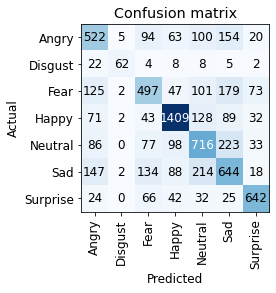

In [28]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

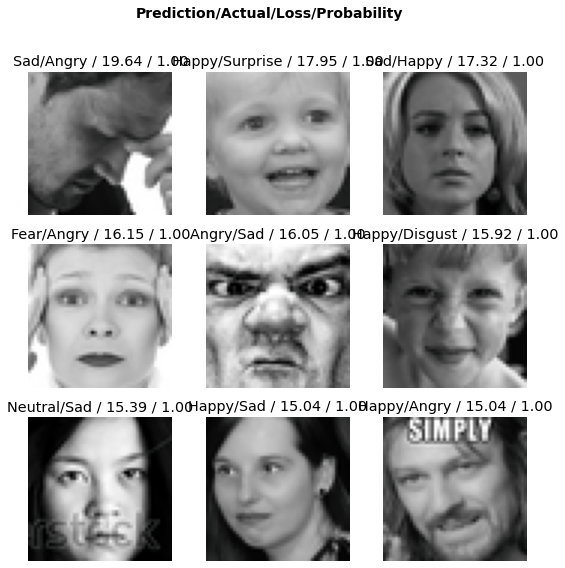

In [32]:
interp.plot_top_losses(k=9)

### VGG16_BN

In [35]:
learn1 = cnn_learner(dls, vgg16_bn, loss_func=CrossEntropyLossFlat(), metrics=accuracy)

SuggestedLRs(valley=0.00363078061491251)

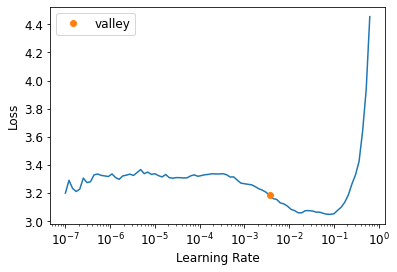

In [36]:
learn1.lr_find()

In [37]:
learn1.fine_tune(8, 0.004)

epoch,train_loss,valid_loss,accuracy,time
0,1.818674,1.662750,0.358038,01:29


epoch,train_loss,valid_loss,accuracy,time
0,1.227622,1.140206,0.571608,02:00
1,1.090163,1.091503,0.601421,02:00
2,0.878629,1.058809,0.619532,02:00
3,0.605922,1.079345,0.645305,02:00
4,0.316315,1.350953,0.643215,02:00
5,0.124027,1.558438,0.654500,02:00
6,0.044370,1.682982,0.664948,02:00
7,0.019134,1.721498,0.662023,02:00


In [46]:
learn1.fine_tune(100, 0.004)

epoch,train_loss,valid_loss,accuracy,time
0,0.027469,2.747995,0.654918,01:36


epoch,train_loss,valid_loss,accuracy,time
0,0.060266,2.424018,0.662719,02:00
1,0.046208,2.337349,0.660351,02:00
2,0.045149,2.290151,0.660630,02:00
3,0.035308,2.226918,0.660630,02:00
4,0.049695,2.184898,0.661884,02:00
5,0.043657,2.224506,0.656590,02:00
6,0.047910,2.325977,0.659794,02:00
7,0.049023,2.166095,0.653803,02:00
8,0.047282,2.046597,0.656590,02:00
9,0.055674,2.120601,0.645026,02:00


### VGG16_BN + SGD

In [13]:
learn2 = cnn_learner(dls, vgg16_bn, loss_func=CrossEntropyLossFlat(), opt_func=SGD, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /tmp/.unburden-cp47/cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

SuggestedLRs(valley=0.02290867641568184)

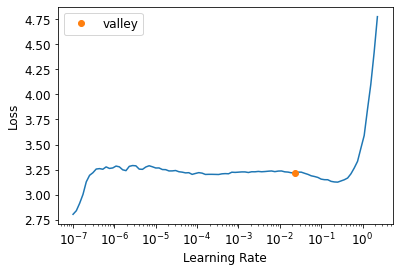

In [16]:
learn2.lr_find()

In [17]:
learn2.fine_tune(8, 0.015)

epoch,train_loss,valid_loss,accuracy,time
0,2.187818,1.763307,0.333658,01:28


epoch,train_loss,valid_loss,accuracy,time
0,1.921602,1.672561,0.368348,01:54
1,1.699766,1.548356,0.417526,01:54
2,1.523057,1.456204,0.453748,01:54
3,1.440397,1.399480,0.470326,01:54
4,1.385937,1.364292,0.482586,01:54
5,1.350266,1.344398,0.491084,01:54
6,1.322596,1.337181,0.494009,01:54
7,1.319076,1.334706,0.496656,01:54


### VGG19_BN

In [18]:
learn3 = cnn_learner(dls, vgg19_bn, loss_func=CrossEntropyLossFlat(), metrics=accuracy)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /tmp/.unburden-cp47/cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

SuggestedLRs(valley=0.002511886414140463)

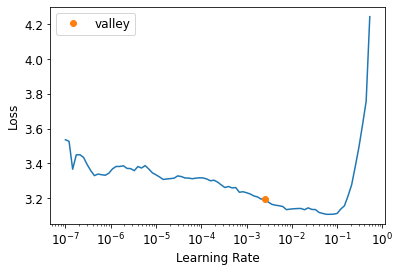

In [19]:
learn3.lr_find()

In [22]:
learn3.fine_tune(8, 0.0025)

epoch,train_loss,valid_loss,accuracy,time
0,1.852932,1.655389,0.356227,00:22


epoch,train_loss,valid_loss,accuracy,time
0,1.286740,1.219561,0.533296,00:32
1,1.094797,1.099293,0.596963,00:32
2,0.929189,1.051162,0.623711,00:32
3,0.654191,1.114638,0.634021,00:32
4,0.340635,1.280205,0.647116,00:32
5,0.143395,1.527748,0.650599,00:32
6,0.052081,1.692255,0.662859,00:32
7,0.021394,1.735504,0.660908,00:32


In [20]:
learn3.fine_tune(20, 0.0025)

epoch,train_loss,valid_loss,accuracy,time
0,1.848780,1.677235,0.350376,01:49


epoch,train_loss,valid_loss,accuracy,time
0,1.321164,1.237149,0.527445,02:29
1,1.092372,1.132828,0.581220,02:29
2,0.928968,1.147665,0.591390,02:29
3,0.763928,1.186132,0.615074,02:29
4,0.665626,1.207110,0.617164,02:29
5,0.521067,1.289592,0.610755,02:30
6,0.406343,1.442632,0.618557,02:30
7,0.305104,1.553304,0.622458,02:30
8,0.235855,1.555216,0.634299,02:30
9,0.192035,1.611847,0.633045,02:29


SuggestedLRs(valley=2.75422871709452e-06)

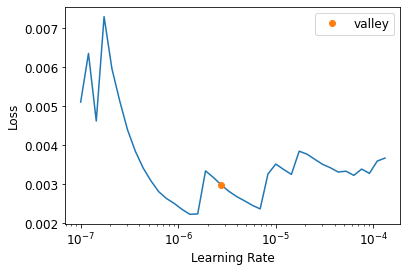

In [21]:
learn3.lr_find()

In [22]:
learn3.fine_tune(20, 2.5e-6)

epoch,train_loss,valid_loss,accuracy,time
0,0.006973,2.182744,0.658122,01:59


epoch,train_loss,valid_loss,accuracy,time
0,0.007617,2.213554,0.655336,02:29
1,0.006524,2.182664,0.658122,02:29
2,0.007198,2.200765,0.657425,02:29
3,0.007252,2.176874,0.657286,02:29
4,0.006950,2.178620,0.659376,02:29
5,0.008672,2.183580,0.657565,02:29
6,0.006912,2.179305,0.657704,02:30
7,0.009821,2.213720,0.658122,02:30
8,0.007524,2.176847,0.658261,02:30
9,0.008234,2.172401,0.655475,02:30


In [23]:
learn3.fine_tune(20, 0.0015)

epoch,train_loss,valid_loss,accuracy,time
0,0.008939,2.404785,0.658540,01:59


epoch,train_loss,valid_loss,accuracy,time
0,0.013935,2.424825,0.654639,02:29
1,0.014759,2.456300,0.649624,02:29
2,0.025691,2.419775,0.642519,02:29
3,0.041563,2.310103,0.638897,02:29
4,0.044825,2.303571,0.643912,02:29
5,0.080356,2.095478,0.640847,02:29
6,0.057802,2.045274,0.645026,02:29
7,0.062112,2.058469,0.639315,02:29
8,0.052991,2.093899,0.648231,02:29
9,0.042793,2.170401,0.639315,02:30
